<a href="https://colab.research.google.com/github/balaji36918/2D-Image-Processing/blob/main/Exercise_1_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

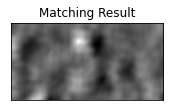

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/sample_data/messi.png', 0)
img2 = img.copy()
template = cv2.imread('/content/sample_data/template.png', 0)
w, h = template.shape[::-1]

img = img2.copy()
method = eval('cv2.TM_CCOEFF')

res = cv2.matchTemplate(img, template, method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

plt.subplot(121), plt.imshow(res, cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.show()

Task 2.1

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("./images/eiffel.png")

#create a blurred image
blurred_img = cv2.GaussianBlur(img, (25,25), 5)#Gaussian blur
#blurred_img = cv2.blur(img, (15,15)) #Average blur
cv2.imwrite("./blur.png", blurred_img)

#create a rectangular mask
mask = np.zeros((1262, 2026, 3), dtype=np.uint8)
mask = cv2.rectangle(mask,(1250, 80), (1700, 1000),(255, 255, 0), -1)
cv2.imwrite("./mask.png", mask)

#combine the original and blurred image based on the mask 
out = np.where(mask!=np.array([255, 255, 0]),blurred_img, img)

cv2.imwrite("./out.png", out)
plt.imshow(out)

Task 2.2

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("./images/lena.png")
blurred_img_gaussian_3 = cv2.GaussianBlur(img, (15, 15), 3)
cv2.imwrite("./blurred_img_gaussian_3.png", blurred_img_gaussian_3)
plt.imshow(blurred_img_gaussian_3)

blurred_img_gaussian_5 = cv2.GaussianBlur(img, (15, 15), 5)
cv2.imwrite("./blurred_img_gaussian_5.png", blurred_img_gaussian_5)
plt.imshow(blurred_img_gaussian_5)

blurred_img_gaussian_7 = cv2.GaussianBlur(img, (15, 15), 7)
cv2.imwrite("./blurred_img_gaussian_7.png", blurred_img_gaussian_7)
plt.imshow(blurred_img_gaussian_7)

blurred_img_average = cv2.blur(img, (5, 5))
cv2.imwrite("./blurred_img_average.png", blurred_img_average)
plt.imshow(blurred_img_average)

Task 3

In [ ]:
import random
import cv2
import numpy as np


def impulse_noise(img):
  
    # Getting the dimensions of the image
    row , col = img.shape
      
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to white
        img[y_coord][x_coord] = 255
                  
    return img

def saltpepper_noise(img):
  
    # Getting the dimensions of the image
    row , col = img.shape
      
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to white
        img[y_coord][x_coord] = 255
          
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to black
        img[y_coord][x_coord] = 0
          
    return img


def gaussian_added(img):
    
    mean = 1 #constant
    std = 1 
    noisy_img = img + np.random.normal(mean, std, img.shape)
    noisy_img_clipped = np.clip(noisy_img, 0, 255)
    return img

# Reading the color image in greyscale image
img = cv2.imread('lena.png', 0)

impulsenoise_added = impulse_noise(img)
saltpeppernoise_added = saltpepper_noise(img)
gaussian_added = gaussian_added(img)

#Noises
cv2.imwrite('Impulsenoise_added.png', impulsenoise_added)
cv2.imwrite('Saltpeppernoise_added.png', saltpeppernoise_added)
cv2.imwrite('gaussian_added.png', gaussian_added)

cv2.imshow('Impulsenoise_added.png', impulsenoise_added)
cv2.imshow('Saltpeppernoise_added.png', saltpeppernoise_added)
cv2.imshow('gaussian_added.png', gaussian_added)

#apply gaussian and average 

sg_ipn = cv2.GaussianBlur(impulsenoise_added, (5,5), 0) #gaussian_smoothening
sg_spn = cv2.GaussianBlur(saltpeppernoise_added, (5,5), 0) 
sg_gaussian = cv2.GaussianBlur(gaussian_added, (5,5), 0)

sa_ipn = cv2.blur(impulsenoise_added, (5,5)) #average_smoothening
sa_spn = cv2.blur(saltpeppernoise_added, (5,5)) 
sa_gaussian = cv2.blur(gaussian_added, (5,5))
       
cv2.imwrite('sg_ipn.png', sg_ipn)
cv2.imwrite('sg_spn.png', sg_spn)
cv2.imwrite('sg_gaussian.png', sg_gaussian)
cv2.imwrite('sa_ipn.png', sa_ipn)
cv2.imwrite('sa_spn.png', sa_spn)
cv2.imwrite('sa_gaussian.png', sa_gaussian)



#applying median filter to noises

mf_ipn = cv2.medianBlur(impulsenoise_added, 5)
mf_spn = cv2.medianBlur(saltpeppernoise_added, 5)
mf_gaussian = cv2.medianBlur(gaussian_added, 5)

cv2.imwrite('mf_ipn.png', mf_ipn)
cv2.imwrite('mf_spn.png', mf_spn)
cv2.imwrite('mf_gaussian.png', mf_gaussian)

#sharpening

filter = np.array([[-1, -1, -1], [-1, 11, -1], [-1, -1, -1]])
sharpen_img_1=cv2.filter2D(img,-1,filter)


cv2.imwrite('sharpen_img.png', sharpen_img_1)

cv2.imshow('Impulsenoise_added.png', impulsenoise_added)
cv2.imshow('Saltpeppernoise_added.png', saltpeppernoise_added)
cv2.imshow('gaussian_added.png', gaussian_added)

cv2.imshow('sg_ipn.png', sg_ipn)
cv2.imshow('sg_spn.png', sg_spn)
cv2.imshow('sg_gaussian.png', sg_gaussian)
cv2.imshow('sa_ipn.png', sa_ipn)
cv2.imshow('sa_spn.png', sa_spn)
cv2.imshow('sa_gaussian.png', sa_gaussian)

cv2.imshow('mf_ipn.png', mf_ipn)
cv2.imshow('mf_spn.png', mf_spn)
cv2.imshow('mf_gaussian.png', mf_gaussian)

cv2.imshow('sharpen_img.png', sharpen_img_1)
cv2.waitKey()

Task 4.1 and 4.3

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('lena.png',0)

laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
laplacian = np.uint8(np.absolute(laplacian))

dft = cv2.dft(np.float32(laplacian), flags=cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,1],dft_shift[:,:,1]))


#HPF mask
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.ones((rows, cols,2),np.uint8)
r = 0
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

fshift = dft_shift * mask

fshift_mask_magHPF = 2000 * np.log(cv2.magnitude(fshift[:,:,0], fshift[:,:,1]))

f_ishift = np.fft.ifftshift(fshift)
img_backHPF = cv2.idft(f_ishift)
img_backHPF = cv2.magnitude(img_backHPF[:,:,0], img_backHPF[:, :,1])




titles = ['Input Image','FFT of an Image after Laplacian', 'FFT + HPF ', 'Output after removing low frequency']
images = [img, magnitude_spectrum,fshift_mask_magHPF, img_backHPF,]



for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i],cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])


plt.show()

Task 4.1 and 4.2

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


img = cv.imread('messi.png',0)
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])


titles = ['Input Image','magnitude_spectrum','After using LPF with mask']
images = [img, magnitude_spectrum, img_back,]


for i in range(3):
    plt.subplot(1, 3, i+1), plt.imshow(images[i],cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


Task 5

[array([147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163]), array([ 1.,  0.,  0.,  0.,  4.,  0., 14.,  0., 23.,  0., 27.,  0., 17.,
        0., 11.,  0.,  3.])]


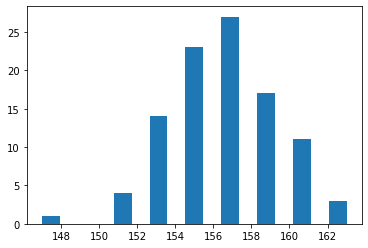

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/sample_data/lena.png")
colorlist = []

def histogram():
    h, w, c = img.shape
    i = 0
    while i < h:
        n = 0
        while n < w:
            colorlist.append(img[i, n][0])
            #print(img[i, n][0])
            n += 1
        i += 1

    histo_list = [np.arange(min(colorlist), max(colorlist)+1, 1)] + [np.zeros(max(colorlist)-min(colorlist)+1)]

    for i in colorlist:
        histo_list[1][i - min(colorlist)] += 1
    print(histo_list)
    plt.hist(colorlist, bins=(max(colorlist)-min(colorlist)+1))
    plt.show()

def histogram_with_values(h,w):
    i = 0
    while i < h:
        n = 0
        while n < w:
            colorlist.append(img[i, n][0])
            #print(img[i,n][0])
            n += 1
        i += 1

    histo_list = [np.arange(min(colorlist), max(colorlist)+1, 1)] + [np.zeros(max(colorlist)-min(colorlist)+1)]

    for i in colorlist:
        histo_list[1][i - min(colorlist)] += 1
    print(histo_list)

    plt.hist(colorlist, bins=(max(colorlist)-min(colorlist)+1))
    plt.show()

histogram_with_values(10,10)
